In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing, linear_model, model_selection, metrics
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings
from sklearn.feature_selection import SelectKBest, mutual_info_regression


# Note conclusion is mentioned in last

# fitler method

# Insights after Performing Data Science Life Cycle on Life Expectancy Dataset Dataset Fitler Method

- HISTORGRAM PLOT


- In Historgram plot we can see that, This distribution suggests that the majority of your data is concentrated in one range or or multiple range: Normalized Loss: Sharp peak on the left side, indicating high frequency of low values. X-axis ranges from 0 to 100,000. Y-axis ranges from 0 to 600.
- Life Expectancy Histogram: Data distributed between 0 and about 100 on the x-axis. Y-axis ranges from 0 to about 100.
- Adult molarity Histogram: Cyan-colored bars with a sharp peak on the left side (similar to alcohal but smaller scale). X-axis ranges from 0 to about 25. Y-axis ranges up to approximately 500.
- Infant death Histogram: Cyan-colored bars showing another sharp initial some peak that declines rapidly. X-axis ranging from around 0 to 1700. Y-axis peaking at just over 1600.



- BOX PLOT


- In boxplot we can see that there are few outlier in our dataset in columns percent of expenditure and instant death and  others
- For removing oultier i use IQR method and after remove we can see new boxplot does contain few amount of oultiers.


- Filter Method feature selection
  Selected Features: Index(['Status', 'Adult Mortality', 'infant deaths', 'Alcohol', ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
  after impelemted fitler method we got 12 important feature that have a large score , i set the k value 12 in this case

- Model Accuracy with Filter method
  
  I implemented three Regression model linear, KNN and random forest with Filter selection method and overall we can see that random forest is very good

  Linear Regression Results:
  R-squared: 0.7397631417225242
   Mean Squared Error: 0.29667355238833315

   KNN Regression Results:
   R-squared: 0.8345544375839484
   Mean Squared Error: 0.18861018786401493

   Random Forest Regression Results:
   R-squared: 0.9057492782424297
   Mean Squared Error: 0.10744710270506258
  overall overmodel accuracy are very good  R-square represent that over mdel accuracy is very good and mean square error.
   showing  over model are very good for prediction
  
  
- Regression Plot


  In our regression plot we can see that our model prediction are very good for all three models
       
       
       
- OLS Regression Model 


   The model predicts life expectancy (dependent variable) for people in different countries.
   Factors like adult mortality, hepatitis B, and expenditure on health seem to significantly affect life expectancy (low p-   values).
   Year and infant deaths have a less significant influence (higher p-values).
   Overall, the model explains 77.5% of the variation in life expectancy.
   There is a statistically significant relationship between the variables (very low p-value).



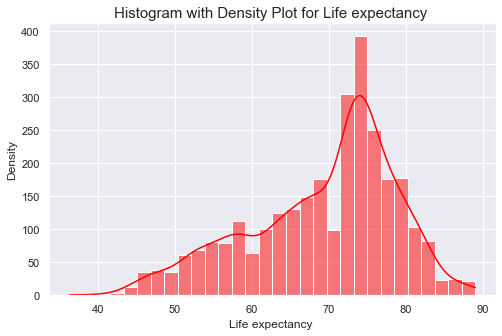

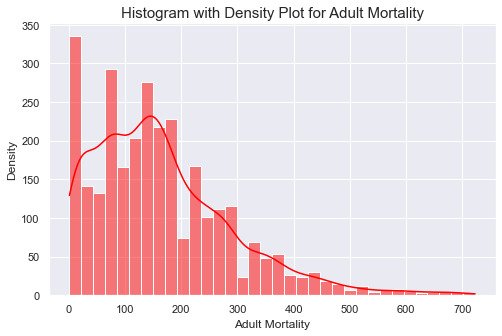

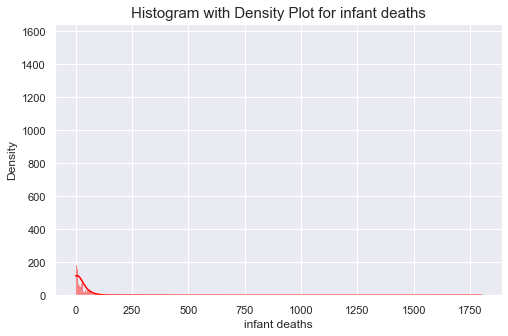

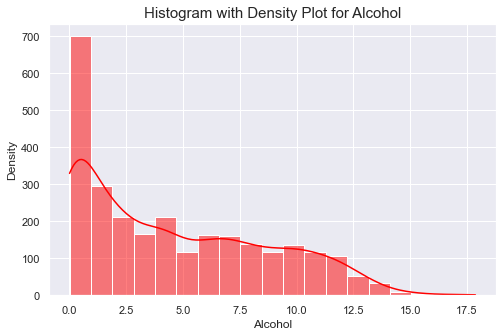

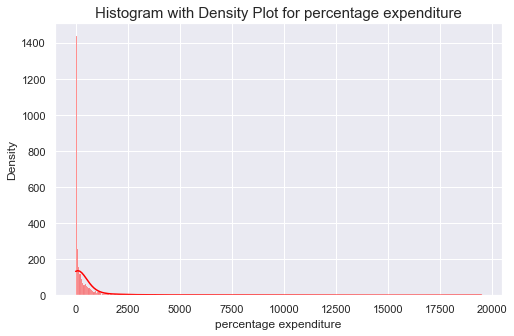

################################################


perfrom eda using boxplot for each column 


################################################




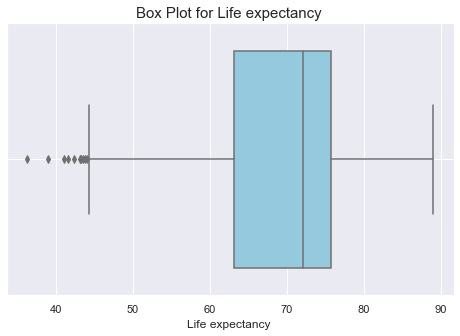

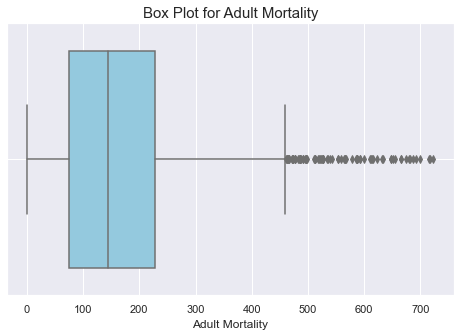

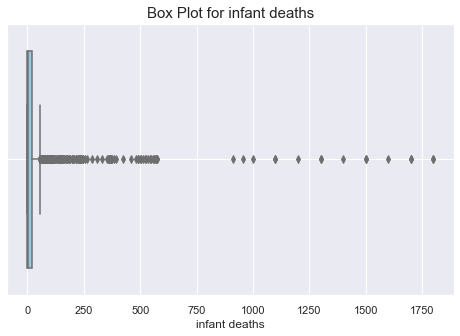

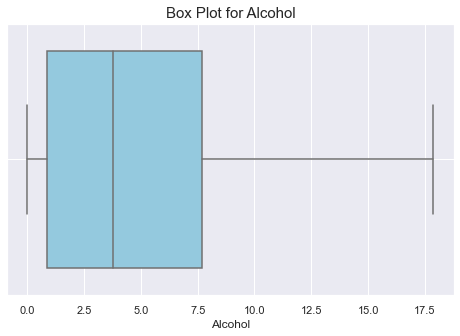

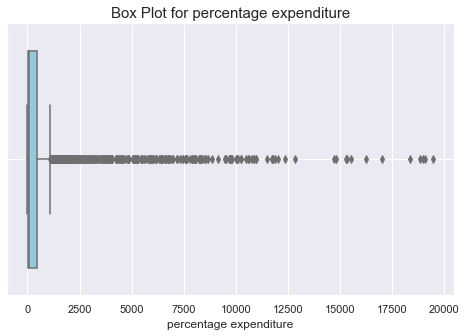

Missing Values:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
Selected Features: Index(['Status', 'Adult Mortality', 'infant deaths', 'Alcohol', ' BMI ',
       'under-five de

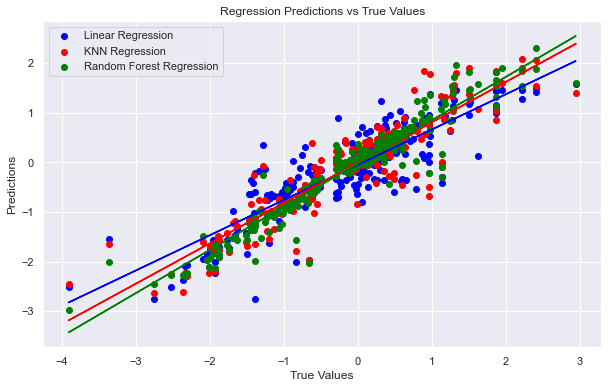

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression  # Added
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import norm
from scipy import stats

def regression_analysis(target_column, file_path):
    df = pd.read_csv(file_path)
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns[1:6]:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[column], kde=True, color='red')
        plt.title(f'Histogram with Density Plot for {column}', fontsize=15)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.grid(True)
        plt.show()
    print('################################################\n\n')
    print('perfrom eda using boxplot for each column \n\n') 
    print('################################################\n\n')

    for column in numeric_columns[1:6]:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[column], color='skyblue')
        plt.title(f'Box Plot for {column}', fontsize=15)
        plt.xlabel(column, fontsize=12)
        plt.grid(True)
        plt.show()
    missing_values = df.isnull().sum()
    print("Missing Values:")
    print(missing_values)
    df.fillna(df.mean(), inplace=True)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    categorical_cols = list(df.select_dtypes(include=['object']).columns)
    for col in categorical_cols:
        df[col] = LabelEncoder().fit_transform(df[col])
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

    X = df_scaled.drop(columns=[target_column])
    y = df_scaled[target_column]
    selector = SelectKBest(score_func=f_regression, k=13) 
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support(indices=True)]
    print("Selected Features:", selected_features)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=21)

    lr_model = LinearRegression()
    knn_model = KNeighborsRegressor()
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    lr_model.fit(X_train, y_train)
    knn_model.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    lr_predictions = lr_model.predict(X_test)
    knn_predictions = knn_model.predict(X_test)
    rf_predictions = rf_model.predict(X_test)
    
    print("Linear Regression Results:")
    print("R-squared:", r2_score(y_test, lr_predictions))
    print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
    
    print("\nKNN Regression Results:")
    print("R-squared:", r2_score(y_test, knn_predictions))
    print("Mean Squared Error:", mean_squared_error(y_test, knn_predictions))
    
    print("\nRandom Forest Regression Results:")
    print("R-squared:", r2_score(y_test, rf_predictions))
    print("Mean Squared Error:", mean_squared_error(y_test, rf_predictions))
   
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, lr_predictions, color='blue', label='Linear Regression')
    lr_line = np.polyfit(y_test, lr_predictions, 1)
    plt.plot(y_test, lr_line[0] * y_test + lr_line[1], color='blue')
    plt.scatter(y_test, knn_predictions, color='red', label='KNN Regression')
    knn_line = np.polyfit(y_test, knn_predictions, 1)
    plt.plot(y_test, knn_line[0] * y_test + knn_line[1], color='red')
    plt.scatter(y_test, rf_predictions, color='green', label='Random Forest Regression')
    rf_line = np.polyfit(y_test, rf_predictions, 1)
    plt.plot(y_test, rf_line[0] * y_test + rf_line[1], color='green')
    
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Regression Predictions vs True Values')
    plt.legend()
    
    X_train_ols = sm.add_constant(X_test)
    ols_model = sm.OLS(y_test, X_train_ols).fit()
    print(ols_model.summary())

regression_analysis('Life expectancy ', r'C:\Users\Hamza\Desktop\Regression.Life.Expectancy.csv')


# WRAPPER METHOD

# Insights after Performing Data Science Life Cycle on Life Expectancy Dataset Dataset WRAPPER METHOD

- HISTORGRAM PLOT


- In Historgram plot we can see that, This distribution suggests that the majority of your data is concentrated in one range or or multiple range: Normalized Loss: Sharp peak on the left side, indicating high frequency of low values. X-axis ranges from 0 to 100,000. Y-axis ranges from 0 to 600.
- Life Expectancy Histogram: Data distributed between 0 and about 100 on the x-axis. Y-axis ranges from 0 to about 100.
- Adult molarity Histogram: Cyan-colored bars with a sharp peak on the left side (similar to alcohal but smaller scale). X-axis ranges from 0 to about 25. Y-axis ranges up to approximately 500.
- Infant death Histogram: Cyan-colored bars showing another sharp initial some peak that declines rapidly. X-axis ranging from around 0 to 1700. Y-axis peaking at just over 1600.



- BOX PLOT


- In boxplot we can see that there are few outlier in our dataset in columns percent of expenditure and instant death and  others
- For removing oultier i use IQR method and after remove we can see new boxplot does contain few amount of oultiers.


- WRAPPER METHOD feature selection
  Selected Features: Index(['Country', 'Adult Mortality', 'Alcohol', ' BMI ', 'Total expenditure',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
  after impelemted wrapper method we got 9 important feature that have a large score 



- Model Accuracy with wrapper method
  
  I implemented three Regression model linear, KNN and random forest with wrapper selection method and overall we can see that random forest is very good

   Linear Regression Results:
   R-squared: 0.7419203943565984
   Mean Squared Error: 0.29421425509053284

   KNN Regression Results:
   R-squared: 0.8261305212357367
   Mean Squared Error: 0.1982135668956716

   Random Forest Regression Results:
   R-squared: 0.901528068890905
   Mean Squared Error: 0.1122593386887771
  overall overmodel accuracy are very good  R-square represent that over mdel accuracy is very good and mean square error.
   showing  over model are very good for prediction
  
  
- Regression Plot


  In our regression plot we can see that our model prediction are very good for all three models
       
       
       
- OLS Regression Model 


   The model predicts life expectancy (dependent variable) for people in different countries.
   Factors like adult mortality, under-five deaths, and BMI seem to significantly affect life expectancy (low p-values).
   The influence of infant deaths and expenditure on health is less clear (higher p-values).
   Overall, the model explains 77.5% of the variation in life expectancy.
   There is a statistically significant relationship between the variables (very low p-value).



Missing Values:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
Selected Features: Index(['Country', 'Adult Mortality', 'Alcohol', ' BMI ', 'Total expenditure',
       ' thinnes

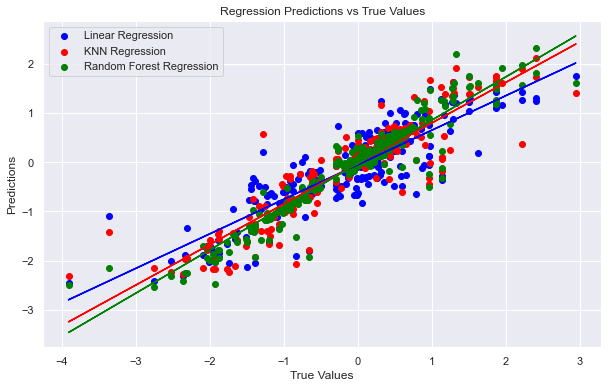

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     78.48
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           5.92e-65
Time:                        19:43:24   Log-Likelihood:                -186.63
No. Observations:                 239   AIC:                             393.3
Df Residuals:                     229   BIC:                             428.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score, mean_squared_error

def regression_analysis(target_column, file_path):
    # Step 1: Load dataset
    df = pd.read_csv(file_path)
    missing_values = df.isnull().sum()
    print("Missing Values:")
    print(missing_values)
    df.fillna(df.mean(), inplace=True)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    categorical_cols = list(df.select_dtypes(include=['object']).columns)
    for col in categorical_cols:
        df[col] = LabelEncoder().fit_transform(df[col])
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
    X = df_scaled.drop(columns=[target_column])
    y = df_scaled[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    rfecv = RFECV(estimator=model, step=1, cv=5, scoring='r2')
    rfecv.fit(X_train, y_train)
    
    selected_features = X_train.columns[rfecv.support_]
    print("Selected Features:", selected_features)
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    lr_model = LinearRegression()
    knn_model = KNeighborsRegressor()
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    lr_model.fit(X_train_selected, y_train)
    knn_model.fit(X_train_selected, y_train)
    rf_model.fit(X_train_selected, y_train)
    lr_predictions = lr_model.predict(X_test_selected)
    knn_predictions = knn_model.predict(X_test_selected)
    rf_predictions = rf_model.predict(X_test_selected)
    
    print("\nLinear Regression Results:")
    print("R-squared:", r2_score(y_test, lr_predictions))
    print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
    
    print("\nKNN Regression Results:")
    print("R-squared:", r2_score(y_test, knn_predictions))
    print("Mean Squared Error:", mean_squared_error(y_test, knn_predictions))
    
    print("\nRandom Forest Regression Results:")
    print("R-squared:", r2_score(y_test, rf_predictions))
    print("Mean Squared Error:", mean_squared_error(y_test, rf_predictions))
    
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, lr_predictions, color='blue', label='Linear Regression')
    lr_line = np.polyfit(y_test, lr_predictions, 1)
    plt.plot(y_test, lr_line[0] * y_test + lr_line[1], color='blue')
    plt.scatter(y_test, knn_predictions, color='red', label='KNN Regression')
    knn_line = np.polyfit(y_test, knn_predictions, 1)
    plt.plot(y_test, knn_line[0] * y_test + knn_line[1], color='red')
    plt.scatter(y_test, rf_predictions, color='green', label='Random Forest Regression')
    rf_line = np.polyfit(y_test, rf_predictions, 1)
    plt.plot(y_test, rf_line[0] * y_test + rf_line[1], color='green')
    
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Regression Predictions vs True Values')
    plt.legend()
    plt.show()
    
    X_train_ols = sm.add_constant(X_test_selected)
    ols_model = sm.OLS(y_test, X_train_ols).fit()
    print(ols_model.summary())
regression_analysis('Life expectancy ', r'C:\Users\Hamza\Desktop\Regression.Life.Expectancy.csv')


# PCA

# Insights after Performing Data Science Life Cycle on Life Expectancy Dataset Dataset PCA METHOD


- PCA  METHOD feature selection
  Here i implemented PCA for feature selection, and add only 2 component in pca, that will create the 2 dimension array 

- Model Accuracy with PCA method
  
  I implemented three Regression model linear, KNN and random forest with PCA  method and overall we can see that ON PCA we are
 not able to get the good accuracy we can see below

   Linear Regression Results:
   R-squared: 0.6682226913779784
   Mean Squared Error: 11.606320696536862

   KNN Regression Results:
   R-squared: 0.6914719447758778
   Mean Squared Error: 10.793009225623448

   Random Forest Regression Results:
    R-squared: 0.6848272899750937
   Mean Squared Error: 11.025454279976286
  overall overmodel accuracy are not good  R-square represent that over mdel accuracy is not good and mean square error.

  
- Regression Plot


  In our regression plot we can see that our model prediction are not very good for all three models
       


Missing Values:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


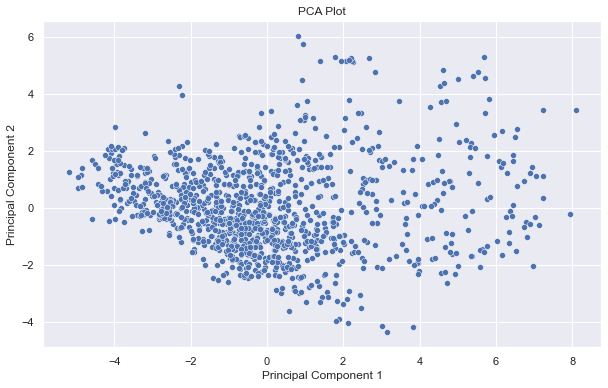

Linear Regression Results:
R-squared: 0.6682226913779784
Mean Squared Error: 11.606320696536862

KNN Regression Results:
R-squared: 0.6914719447758778
Mean Squared Error: 10.793009225623448

Random Forest Regression Results:
R-squared: 0.6848272899750937
Mean Squared Error: 11.025454279976286


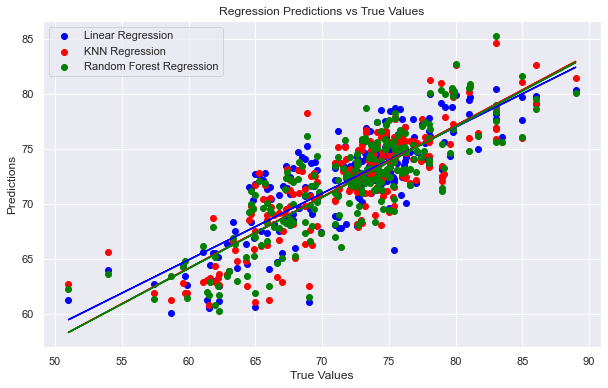

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import norm
from scipy import stats
from sklearn.decomposition import PCA  # Import PCA

def regression_analysis(target_column, file_path):
    df = pd.read_csv(file_path)
    missing_values = df.isnull().sum()
    print("Missing Values:")
    print(missing_values)
    df.fillna(df.mean(), inplace=True)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    categorical_cols = list(df.select_dtypes(include=['object']).columns)
    for col in categorical_cols:
        df[col] = LabelEncoder().fit_transform(df[col])
    
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
    pca = PCA(n_components=2)  
    df_pca = pca.fit_transform(df_scaled)

    df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])  # Update column names
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PC1', y='PC2', data=df_pca)
    plt.title('PCA Plot')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    
    X = df_pca 
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
    lr_model = LinearRegression()
    knn_model = KNeighborsRegressor()
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    lr_model.fit(X_train, y_train)
    knn_model.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)
    knn_predictions = knn_model.predict(X_test)
    rf_predictions = rf_model.predict(X_test)
    
    print("Linear Regression Results:")
    print("R-squared:", r2_score(y_test, lr_predictions))
    print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
    
    print("\nKNN Regression Results:")
    print("R-squared:", r2_score(y_test, knn_predictions))
    print("Mean Squared Error:", mean_squared_error(y_test, knn_predictions))
    
    print("\nRandom Forest Regression Results:")
    print("R-squared:", r2_score(y_test, rf_predictions))
    print("Mean Squared Error:", mean_squared_error(y_test, rf_predictions))

    plt.figure(figsize=(10,6))
    plt.scatter(y_test, lr_predictions, color='blue', label='Linear Regression')
    lr_line = np.polyfit(y_test, lr_predictions, 1)
    plt.plot(y_test, lr_line[0] * y_test + lr_line[1], color='blue')
    plt.scatter(y_test, knn_predictions, color='red', label='KNN Regression')
    knn_line = np.polyfit(y_test, knn_predictions, 1)
    plt.plot(y_test, knn_line[0] * y_test + knn_line[1], color='red')
    plt.scatter(y_test, rf_predictions, color='green', label='Random Forest Regression')
    rf_line = np.polyfit(y_test, rf_predictions, 1)
    plt.plot(y_test, rf_line[0] * y_test + rf_line[1], color='green')
    
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Regression Predictions vs True Values')
    plt.legend()
    plt.show()

regression_analysis('Life expectancy ', r'C:\Users\Hamza\Desktop\Regression.Life.Expectancy.csv')


# Conclusion

AFter implementing regression model in our dataset we see that wrapper and fitler method are able to provide good accuracy
we can see that fitler method accuracy are :

Linear Regression Results:
R-squared: 0.7397631417225242
Mean Squared Error: 0.29667355238833315

KNN Regression Results:
R-squared: 0.8345544375839484
Mean Squared Error: 0.18861018786401493

Random Forest Regression Results:
R-squared: 0.9057492782424297
Mean Squared Error: 0.10744710270506258

this accuracy is two good if we compare with PCA 